In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
year_2000 = pd.read_csv('Data/ final_tmdb_data2000.csv.gz')
year_2001 = pd.read_csv('Data/ final_tmdb_data2001.csv.gz')
df = pd.concat([year_2000, year_2001], ignore_index=True)

In [4]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.114,2188.0,PG


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2565 non-null   object 
 1   adult                  2563 non-null   float64
 2   backdrop_path          1392 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2563 non-null   float64
 5   genres                 2563 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2563 non-null   float64
 8   original_language      2563 non-null   object 
 9   original_title         2563 non-null   object 
 10  overview               2512 non-null   object 
 11  popularity             2563 non-null   float64
 12  poster_path            2306 non-null   object 
 13  production_companies   2563 non-null   object 
 14  production_countries   2563 non-null   object 
 15  rele

# 1. How many movies had at least some valid financial information (values > 0 ) for budget or revenue?

In [15]:
filtered_df = df[(df['budget'] > 0) | (df['revenue'] > 0)]
filtered_movies = len(filtered_df)
total_movies = len(df)


In [14]:
filtered_movies

636

Text(0.5, 1.0, 'Movies with Budget or Revenue Greater than 0')

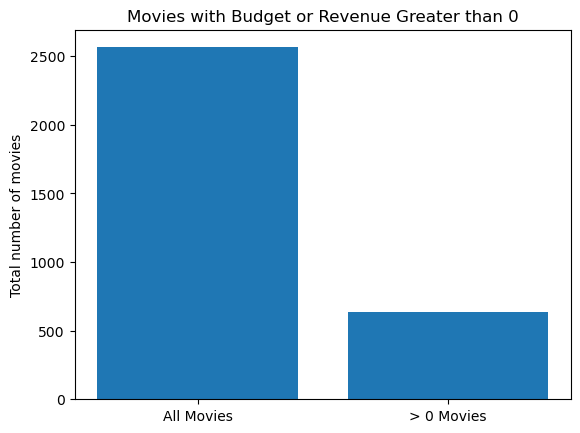

In [17]:
#There are 636 movies with a budget or revenue above 0

fig, ax = plt.subplots()
ax.bar(['All Movies', '> 0 Movies'], [total_movies, filtered_movies])
ax.set_ylabel('Total number of movies')
ax.set_title('Movies with Budget or Revenue Greater than 0')

# 2. How many movies are there in each certification category?

In [23]:
rating_counts = df.groupby('certification').size()
rating_counts

certification
G           24
NC-17        6
NR          73
PG          64
PG-13      182
R          464
Unrated      1
dtype: int64

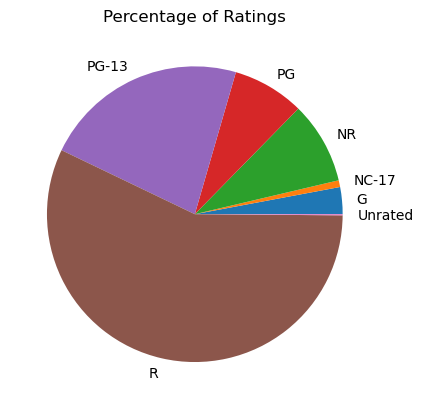

In [24]:
fig, ax = plt.subplots()
ax.pie(rating_counts.values, labels=rating_counts.index)
ax.set_title('Percentage of Ratings')
plt.show()

# 3. What is the average rating per certification category?

In [28]:
avg_rev = df.groupby('certification')['revenue'].mean()
print(avg_rev)

certification
G          7.218533e+07
NC-17      0.000000e+00
NR         2.232979e+06
PG         6.094440e+07
PG-13      7.146544e+07
R          1.619416e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64


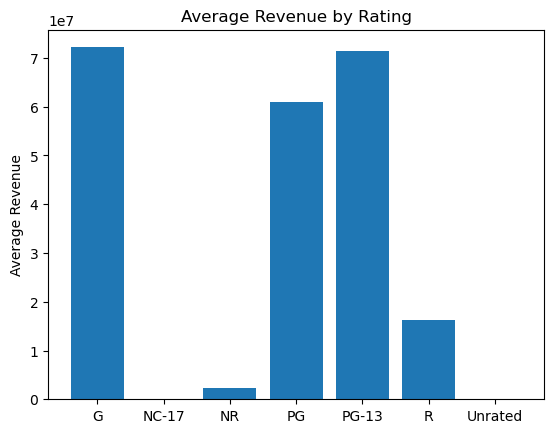

In [29]:
fig, ax = plt.subplots()
ax.bar(avg_rev.index, avg_rev.values)
ax.set_ylabel('Average Revenue')
ax.set_title('Average Revenue by Rating')
plt.show()

In [30]:
avg_bud = df.groupby('certification')['budget'].mean()
print(avg_bud)

certification
G          2.383333e+07
NC-17      0.000000e+00
NR         1.467673e+06
PG         2.451558e+07
PG-13      3.094592e+07
R          9.729104e+06
Unrated    0.000000e+00
Name: budget, dtype: float64


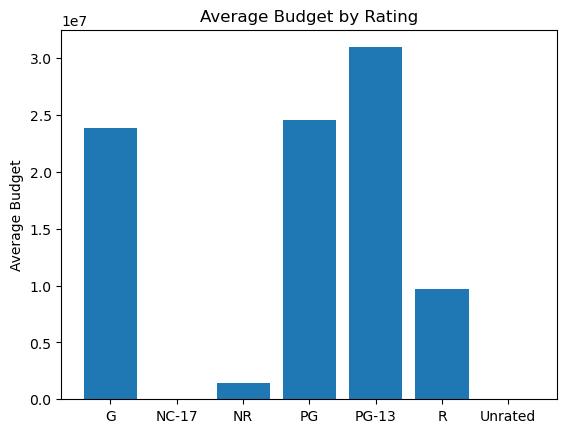

In [31]:
fig, ax = plt.subplots()
ax.bar(avg_bud.index, avg_bud.values)
ax.set_ylabel('Average Budget')
ax.set_title('Average Budget by Rating')
plt.show()